# Unzip Dataset

In [ ]:
!unzip archive.zip

# Import Libraries

In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense




# Load Dataset

In [33]:
IMAGE_SIZE = (64, 64)
DATASET_DIR = '/content/dataset'

class_names = [d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))]
class_names.sort()
num_classes = len(class_names)

class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

X, y = [], []

for class_name in class_names:
    class_dir = os.path.join(DATASET_DIR, class_name)
    for file in os.listdir(class_dir):
        file_path = os.path.join(class_dir, file)
        try:
            img = load_img(file_path, target_size=IMAGE_SIZE, color_mode='rgb')
            img_array = img_to_array(img)
            X.append(img_array)
            y.append(class_to_label[class_name])
        except:
            pass

X = np.array(X, dtype='float32') / 255.0
y = np.array(y)

# One-hot encoding
y_one_hot = to_categorical(y, num_classes=num_classes)

print(X.shape, y_one_hot.shape)

(967, 64, 64, 3) (967, 10)


# Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_one_hot,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (773, 64, 64, 3)
X_test: (194, 64, 64, 3)
y_train: (773, 10)
y_test: (194, 10)


# MLP

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.0854 - loss: 8.6681 - val_accuracy: 0.0876 - val_loss: 3.2737
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.2367 - loss: 2.5126 - val_accuracy: 0.1804 - val_loss: 2.3809
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.3030 - loss: 2.0471 - val_accuracy: 0.4278 - val_loss: 1.6206
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.5450 - loss: 1.4729 - val_accuracy: 0.3660 - val_loss: 1.7158
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5430 - loss: 1.4494 - val_accuracy: 0.5361 - val_loss: 1.3962
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.6367 - loss: 1.2220 - val_accuracy: 0.7010 - val_loss: 0.9852
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.7863 - loss: 0.8407 - val_accuracy: 0.8041 - val_loss: 0.7600
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.8661 - loss: 0.5845 - val_accuracy: 0.8247 - 

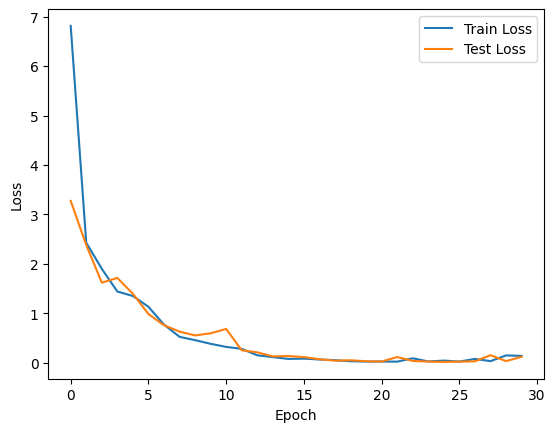

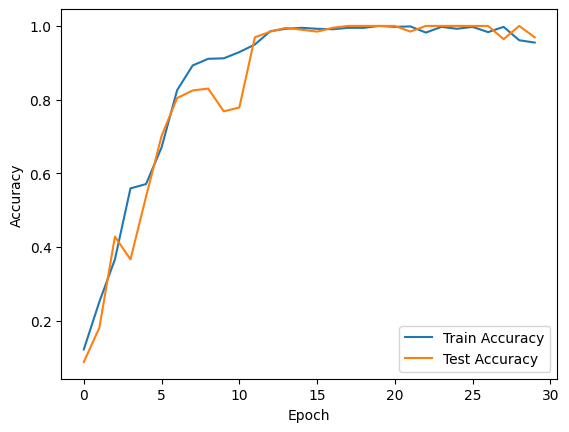

In [35]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=30
)

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Explanation

## Ανάλυση Αρχιτεκτονικής MLP

Το μοντέλο που υλοποιήθηκε είναι ένα **Multilayer Perceptron (MLP)**, σχεδιασμένο για πρόβλημα ταξινόμησης εικόνων.

---

### 1. Επίπεδο Flatten
- **Είδος επιπέδου:** Flatten
- **Είσοδος:** Εικόνα διαστάσεων 64 × 64 × 3
- **Πλήθος εισόδων:** 64 × 64 × 3 = 12.288
- **Έξοδος:** Διάνυσμα μήκους 12.288
- **Συνάρτηση ενεργοποίησης:** Δεν εφαρμόζεται

**Περιγραφή:**  
Το επίπεδο Flatten μετατρέπει την πολυδιάστατη εικόνα σε μονοδιάστατο διάνυσμα, ώστε να μπορεί να χρησιμοποιηθεί από πλήρως συνδεδεμένα επίπεδα.

---

### 2. Πρώτο Κρυφό Επίπεδο (Dense – 512 νευρώνες)
- **Είδος επιπέδου:** Fully Connected (Dense)
- **Πλήθος εισόδων:** 12.288
- **Πλήθος εξόδων:** 512
- **Συνάρτηση ενεργοποίησης:** ReLU

**Περιγραφή:**  
Το επίπεδο αυτό μαθαίνει μη γραμμικούς συνδυασμούς χαρακτηριστικών της εικόνας.  
Η συνάρτηση ReLU επιταχύνει τη σύγκλιση και περιορίζει το πρόβλημα του vanishing gradient.

---

### 3. Δεύτερο Κρυφό Επίπεδο (Dense – 256 νευρώνες)
- **Είδος επιπέδου:** Fully Connected (Dense)
- **Πλήθος εισόδων:** 512
- **Πλήθος εξόδων:** 256
- **Συνάρτηση ενεργοποίησης:** ReLU

**Περιγραφή:**  
Μειώνει τη διάσταση της αναπαράστασης και εξάγει πιο αφηρημένα χαρακτηριστικά, χρήσιμα για τη διάκριση των κατηγοριών.

---

### 4. Επίπεδο Εξόδου (Dense – αριθμός κλάσεων)
- **Είδος επιπέδου:** Fully Connected (Dense)
- **Πλήθος εισόδων:** 256
- **Πλήθος εξόδων:** C (όπου C ο αριθμός των κατηγοριών)
- **Συνάρτηση ενεργοποίησης:** Softmax

**Περιγραφή:**  
Το επίπεδο εξόδου παράγει πιθανότητες για κάθε κατηγορία.  
Η Softmax εξασφαλίζει ότι το άθροισμα των εξόδων είναι ίσο με 1, επιτρέποντας την ταξινόμηση.

---

## Συνάρτηση Κόστους και Βελτιστοποίηση

- **Loss Function:** Categorical Cross-Entropy  
  Κατάλληλη για προβλήματα πολυταξινόμησης με one-hot encoded labels.

- **Optimizer:** Adam (Learning Rate = 0.001)  
  Προσαρμόζει δυναμικά το learning rate και επιτυγχάνει γρήγορη και σταθερή εκπαίδευση.

---

## Σχόλια για το Μοντέλο
- Το MLP δεν εκμεταλλεύεται τη χωρική πληροφορία των εικόνων.
- Ο μεγάλος αριθμός παραμέτρων αυξάνει την πιθανότητα overfitting.

# CNN

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 248ms/step - accuracy: 0.1333 - loss: 2.3051 - val_accuracy: 0.1907 - val_loss: 2.1392
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.3095 - loss: 1.9728 - val_accuracy: 0.4227 - val_loss: 1.7320
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.5638 - loss: 1.3165 - val_accuracy: 0.5722 - val_loss: 1.1587
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.7827 - loss: 0.6638 - val_accuracy: 0.8454 - val_loss: 0.4428
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.9290 - loss: 0.2600 - val_accuracy: 0.9639 - val_loss: 0.1856
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.9877 - loss: 0.0964 - val_accuracy: 0.9897 - val_loss: 0.0741
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.9934 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.9994 - loss: 0.0110 - val_accuracy: 1

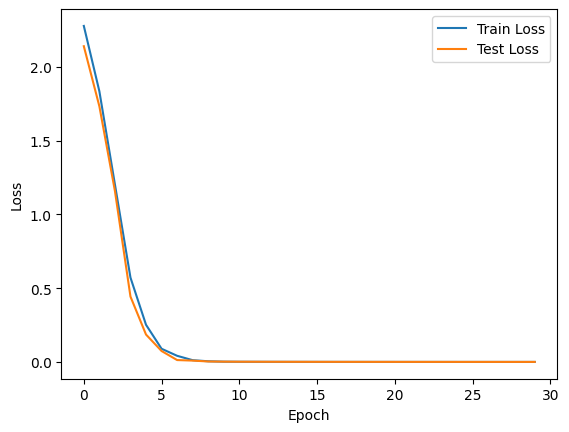

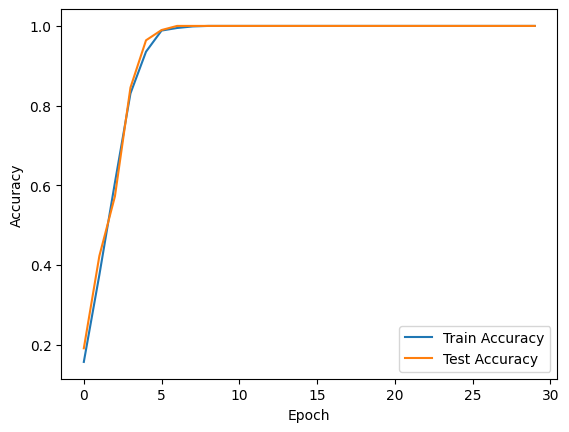

In [40]:

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=30
)

plt.figure()
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Comparison MLP vs CNN

## Σύγκριση MLP vs CNN για Κατηγοριοποίηση Εικόνων

| Χαρακτηριστικό                  | MLP                          | CNN                           |
|---------------------------------|-------------------------------|-------------------------------|
| Εκμετάλλευση χωρικής πληροφορίας | Όχι                           | Ναι (φίλτρα Conv2D)          |
| Αριθμός παραμέτρων               | Πολύ μεγάλος στα πρώτα Dense | Περιορισμένος λόγω Conv2D     |
| Ικανότητα γενίκευσης             | Χαμηλή (overfitting)         | Υψηλότερη                     |


### Συμπέρασμα
Το CNN είναι καλύτερο για εικόνες, καθώς:
- Εξάγει χωρικά χαρακτηριστικά,
- Μειώνει το overfitting,

# Improved CNN

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 383ms/step - accuracy: 0.1449 - loss: 5.5072 - val_accuracy: 0.4639 - val_loss: 1.8498
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 369ms/step - accuracy: 0.6777 - loss: 1.4680 - val_accuracy: 0.9175 - val_loss: 0.7894
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 402ms/step - accuracy: 0.9420 - loss: 0.4596 - val_accuracy: 1.0000 - val_loss: 0.1805
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.9959 - loss: 0.1021 - val_accuracy: 1.0000 - val_loss: 0.0660
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 414ms/step - accuracy: 1.0000 - loss: 0.0274 - val_accuracy: 1.0000 - val_loss: 0.0234


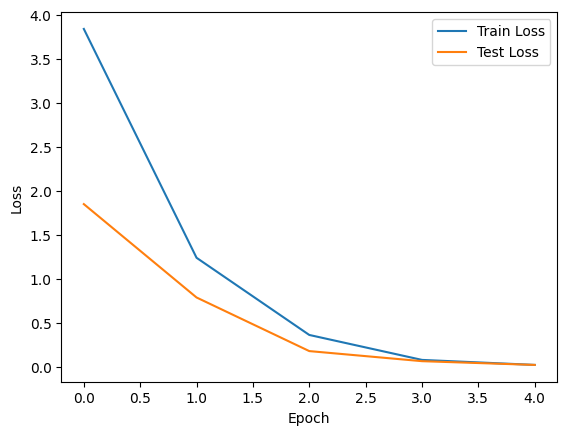

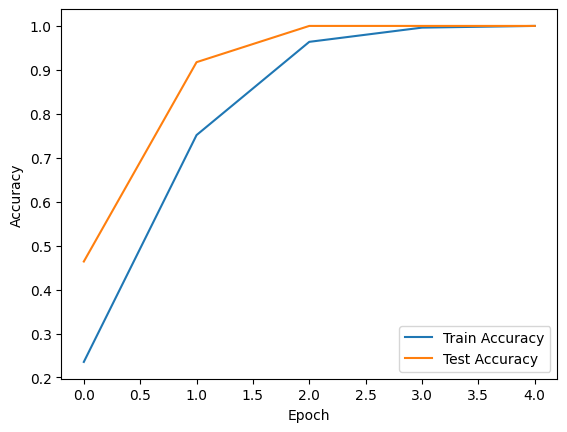

In [48]:

model_cnn = Sequential([
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)
model_cnn.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = model_cnn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=5
)

plt.figure()
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Architecture Changes

Παρατηρούμε ότι αφαιρώντας δύο layers, δηλαδή τροποποιώντας την αρχιτεκτονική του μοντέλου, επιτυγχάνουμε σημαντικά ταχύτερη σύγκλιση στο accuracy 1.